# Simple growth model derivation of savings rate

In [15]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
df = pd.read_excel('simple_golden_rule_pan.xlsx', sheet_name = 'data')
df.head()

,Year,K,Y,L,k,y,n
0,1960,5.715010e+08,3.068858e+09,1126989,507.104326,2723.059769,NaN
1,1961,7.257556e+08,3.404180e+09,1160832,625.202989,2932.534708,0.030030
2,1962,8.176342e+08,3.684846e+09,1196289,683.475477,3080.230465,0.030544
3,1963,9.187848e+08,3.999487e+09,1233267,745.000740,3243.001739,0.030911
4,1964,8.378643e+08,4.176750e+09,1271461,658.977623,3285.000094,0.030970


## Trend GDP

Hodrick & Prescott filter

In [17]:
df = df.dropna().reset_index(drop=True)
df['cycle_k'], df['trend_k'] = sm.tsa.filters.hpfilter(df['k'], lamb= 1600)
df['cycle_y'], df['trend_y'] = sm.tsa.filters.hpfilter(df['y'], lamb= 1600)
df['cycle_n'], df['trend_n'] = sm.tsa.filters.hpfilter(df['n'], lamb= 1600)

## Steady state

Based in the Solow growth model,  the steady state can be defined as:
$$ 0 = sf(k^{*}) - (\delta  + n) k^{*}$$

Equivalently:

$$ \frac{y^{*}}{k^{*}} =  \phi (k^{*}) = \frac{\delta + n}{s} $$

If we solve for $s$:

$$ s = \frac{\delta + n}{ y^{*} / k^{*}} $$


Where:

* $k^{*}$ = = capital stock per capita in steady state
* $k^{*}$ = output per capita in steady state
* $ \delta $ = capital depreciation rate
* $ n $ = population growht rate
* s = savings rate

In [18]:
def savings_rate(delta, n, y, k):
    """
    delta = capital depreciation rate
    n = population growth rate
    y = output per worker, i.e, GDP per capita
    k = capital per worker
    """
    s = (delta + n ) / (y/k)
    return(s)

### Capital depreciation rate in Panamá

Empirical evidence:


"Investment and Capital Stock Depreciation in Panama" by Samuel Mongrut Montalván. This study analyzes the determinants of investment and capital stock depreciation in Panama using data from 1996 to 2013. The study estimates an average capital depreciation rate of ```7.6%``` for all types of assets, with higher rates for machinery and equipment.

"Estimación de la tasa de depreciación de capital para la economía panameña" by Edgar García-Sánchez and Rita G. Martínez-Vergara. This study estimates the capital depreciation rate for Panama using data from the national accounts. The study estimates a capital depreciation rate of around ```5.5%```.



In [23]:
delta_grid = np.linspace(0.055, 0.076, 100)

### Population growth rate
Is calculated above for the last 30 years

In [19]:
n_30y = df['trend_n'][-30:].mean()
n_30y

0.018584272151147586

### Output and capital
$y^{*}$ and $k^{*}$ are taken as the 2021 trend GDP per capita and Capital per worker in columns ```trend_y``` and ```trend_k```

### Savings rate

In [20]:
#Rolling 20 and 30 year mean
df['n_20'] = df['n'].rolling(window=20).mean()
df['n_20'].fillna(method = 'backfill', inplace = True)

df['n_30'] = df['n'].rolling(window=30).mean()
df['n_30'].fillna(method = 'backfill', inplace = True)
df.head()


,Year,K,Y,L,k,y,n,cycle_k,trend_k,cycle_y,trend_y,cycle_n,trend_n,n_20,n_30
0,1961,7.257556e+08,3.404180e+09,1160832,625.202989,2932.534708,0.030030,-171.755992,796.958981,-171.884519,3104.419228,-0.001522,0.031551,0.02798,0.026227
1,1962,8.176342e+08,3.684846e+09,1196289,683.475477,3080.230465,0.030544,-159.226540,842.702017,-155.002111,3235.232577,-0.000648,0.031193,0.02798,0.026227
2,1963,9.187848e+08,3.999487e+09,1233267,745.000740,3243.001739,0.030911,-143.336964,888.337704,-122.936759,3365.938498,0.000078,0.030833,0.02798,0.026227
3,1964,8.378643e+08,4.176750e+09,1271461,658.977623,3285.000094,0.030970,-274.681558,933.659181,-211.332593,3496.332687,0.000499,0.030471,0.02798,0.026227
4,1965,9.508159e+08,4.559341e+09,1310556,725.505716,3478.936630,0.030748,-252.864279,978.369996,-147.197375,3626.134005,0.000643,0.030105,0.02798,0.026227


C:\Users\danie\anaconda3\envs\risk\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot: ylabel='Density'>

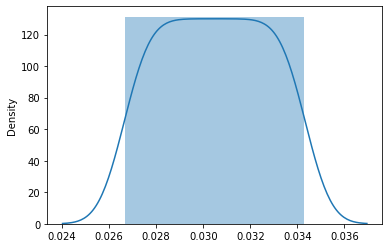

In [28]:
y = df['trend_y'].iloc[-1]
k = df['trend_k'].iloc[-1]
n = n_30y
s_list = []
for i in range(len(delta_grid)):
    s = savings_rate(delta_grid[i], n, y, k)
    s_list.append(s)

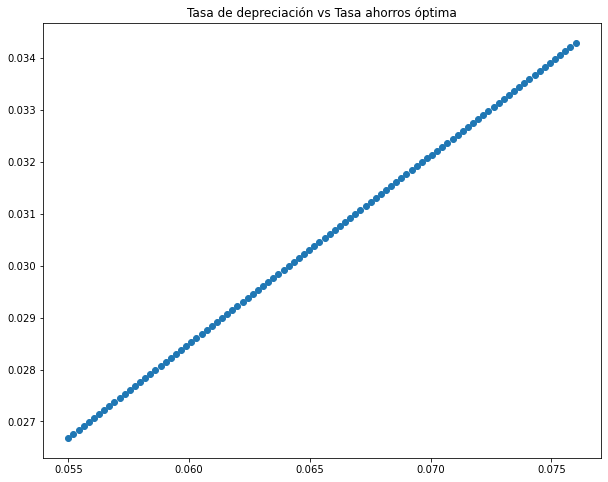

In [31]:
plt.figure(figsize=(10,8))
plt.scatter(delta_grid, s_list)
plt.title('Tasa de depreciación vs Tasa ahorros óptima')
plt.show()

In [36]:
import statistics
statistics.mean(s_list)

0.030487439684549218

In [38]:
statistics.min(s_list)

AttributeError: module 'statistics' has no attribute 'min'